In [1]:
# Load required packages
import pandas as pd
import numpy as np
import time

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

In [2]:
# Load data 24h

new_dataset = pd.read_csv("../augmento_BTC_24h.csv").sort_values("Date")
new_dataset.index = pd.to_datetime(new_dataset["Date"])
new_dataset = new_dataset.drop(columns="BTC_Volume")

new_dataset1 = new_dataset.iloc[:,1:] # with price
new_dataset = new_dataset.iloc[:,2:] # no price

In [3]:
# 24h -- clusters based on all sentiments

K = 16
clusters_loop = np.empty((K, new_dataset.shape[0]))

for k in range(2, K):
    time_start = time.time()
    kmeans_loop = KMeans(n_clusters=k, random_state=0)
    kmeans_loop.fit(new_dataset.values)
    c_initialization_loop = kmeans_loop.cluster_centers_ 
    clusters_loop[k,:] = kmeans_loop.labels_
    t = float(round(time.time() - time_start, 2))
    print('Kmeans for {} clusters converges. Time elapsed: {} seconds.'.format(k, t))

Kmeans for 2 clusters converges. Time elapsed: 0.07 seconds.
Kmeans for 3 clusters converges. Time elapsed: 0.07 seconds.
Kmeans for 4 clusters converges. Time elapsed: 0.13 seconds.
Kmeans for 5 clusters converges. Time elapsed: 0.11 seconds.
Kmeans for 6 clusters converges. Time elapsed: 0.14 seconds.
Kmeans for 7 clusters converges. Time elapsed: 0.12 seconds.
Kmeans for 8 clusters converges. Time elapsed: 0.14 seconds.
Kmeans for 9 clusters converges. Time elapsed: 0.22 seconds.
Kmeans for 10 clusters converges. Time elapsed: 0.21 seconds.
Kmeans for 11 clusters converges. Time elapsed: 0.21 seconds.
Kmeans for 12 clusters converges. Time elapsed: 0.19 seconds.
Kmeans for 13 clusters converges. Time elapsed: 0.21 seconds.
Kmeans for 14 clusters converges. Time elapsed: 0.2 seconds.
Kmeans for 15 clusters converges. Time elapsed: 0.2 seconds.


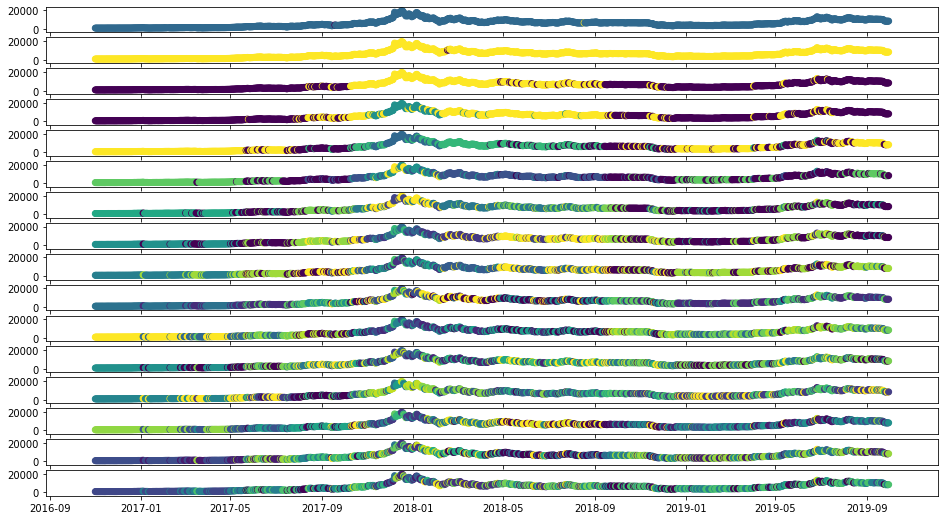

In [4]:
# Quick overview over clustering results:

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig, axes = plt.subplots(K, 1, sharex=True, sharey=True, figsize=(16,9))

for i, ax in enumerate(axes.flatten()):
    ax.scatter(new_dataset1.index, new_dataset1.BTC_Price, c=clusters_loop[i])
    #plt.savefig('clusters_' + str(i) + '_all_new.png', dpi=300, transparent=True)
plt.show()

In [5]:
# loop over plots and save them for a visual comparison

for i, c in enumerate(clusters_loop): 
    
    break # uncode to execute loop
    
    fig = plt.figure(figsize = (16,9))
    plt.scatter(new_dataset1.index, new_dataset1.values[:, 0].T, c=c) #2,4 
    xfmt = mdates.DateFormatter("%Y-%m")
    plt.savefig('clusters_'+str(i)+'_all_new.png', dpi=300, transparent=True)

Kmeans converges. Time elapsed: 0.1677989959716797 seconds


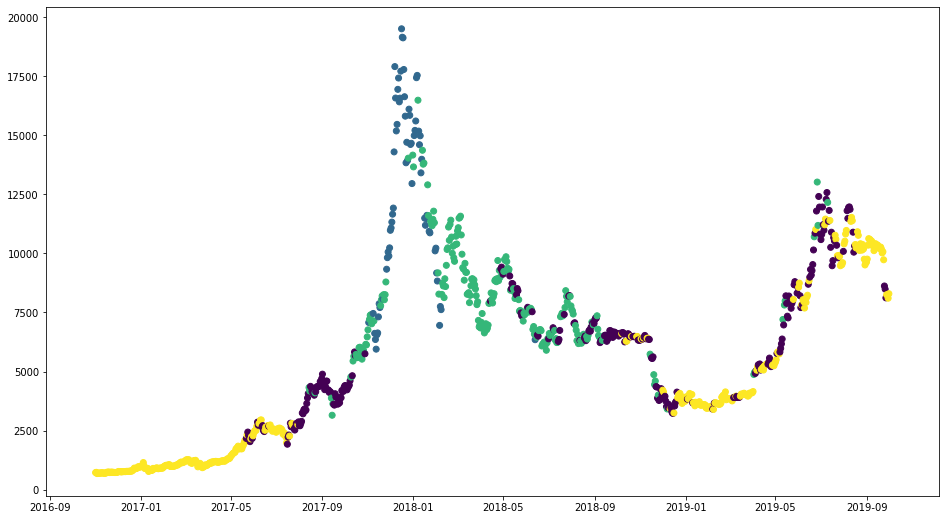

In [6]:
# 24h -- 4 clusters

time_start = time.time()
kmeans_new = KMeans(n_clusters=4, random_state=0)
kmeans_new.fit(new_dataset.values)
c_initialization_new = kmeans_new.cluster_centers_ 
clusters_new = kmeans_new.labels_
print('Kmeans converges. Time elapsed: {} seconds'.format(time.time()-time_start))

fig = plt.figure(figsize = (16,9))
plt.scatter(new_dataset1.index, new_dataset1.values[:, 0].T, c=clusters_new) #2,4 
xfmt = mdates.DateFormatter("%Y-%m")
plt.savefig('kmeans_24h_4clusters.png', dpi=300, transparent=True)

Kmeans converges. Time elapsed: 0.14485979080200195 seconds


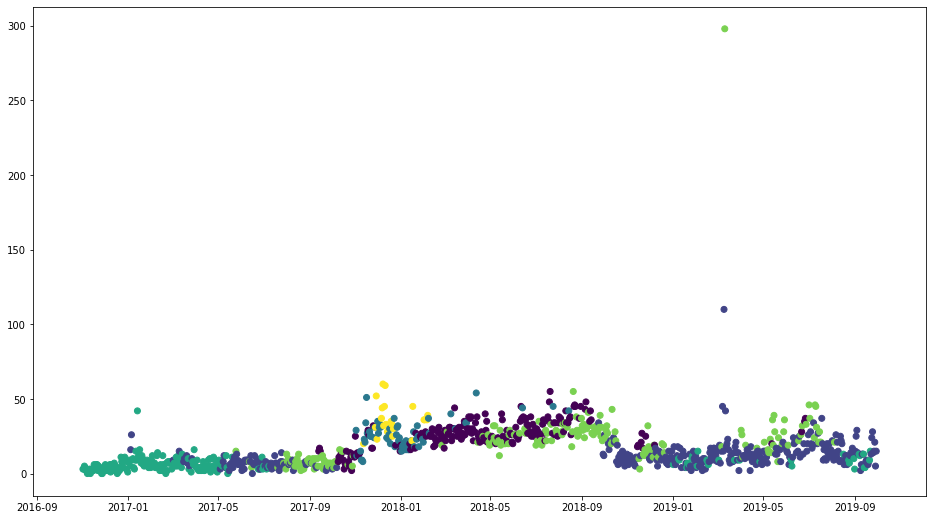

In [7]:
# NOT used in the presentation (code originally was referencing 1h data, adjusted by G.)

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
new_data = svd.fit_transform(new_dataset.values)


time_start = time.time()
kmeans_svd = KMeans(n_clusters=6, random_state=0)
kmeans_svd.fit(new_data)
c_initialization_svd = kmeans_svd.cluster_centers_ 
clusters_svd = kmeans_svd.labels_
print('Kmeans converges. Time elapsed: {} seconds'.format(time.time()-time_start))

import matplotlib.pyplot as plt
import matplotlib.animation
import matplotlib.dates as mdates
fig = plt.figure(figsize = (16,9))
plt.scatter(new_dataset1.index, new_dataset1.values[:, 9].T, c=clusters_svd)
xfmt = mdates.DateFormatter("%Y-%m")

In [8]:
# TSNE

time_start = time.time()
tsne_new = TSNE(n_components=2, verbose=2, perplexity=40, n_iter=300)
tsne_new_results = tsne_new.fit_transform(new_dataset)
print('TSNE computed. Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1064 samples in 0.004s...
[t-SNE] Computed neighbors for 1064 samples in 0.115s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1064
[t-SNE] Computed conditional probabilities for sample 1064 / 1064
[t-SNE] Mean sigma: 183.907352
[t-SNE] Computed conditional probabilities in 0.082s
[t-SNE] Iteration 50: error = 60.9283218, gradient norm = 0.2262990 (50 iterations in 0.589s)
[t-SNE] Iteration 100: error = 56.6355515, gradient norm = 0.1846042 (50 iterations in 0.431s)
[t-SNE] Iteration 150: error = 56.3397636, gradient norm = 0.1811458 (50 iterations in 0.367s)
[t-SNE] Iteration 200: error = 55.8925400, gradient norm = 0.1810944 (50 iterations in 0.479s)
[t-SNE] Iteration 250: error = 55.9732132, gradient norm = 0.1715468 (50 iterations in 0.565s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.973213
[t-SNE] Iteration 300: error = 0.6391010, gradient norm = 0.0008769 (50 iterations in 0.32

In [9]:
time_start = time.time()
kmeans_tsne_new = KMeans(n_clusters=4, random_state=0)
kmeans_tsne_new.fit(tsne_new_results)
c_initialization_tsne_new = kmeans_tsne_new.cluster_centers_ 
clusters_tsne_new = kmeans_tsne_new.labels_
print('Kmeans converges. Time elapsed: {} seconds'.format(time.time()-time_start))

Kmeans converges. Time elapsed: 0.09017324447631836 seconds


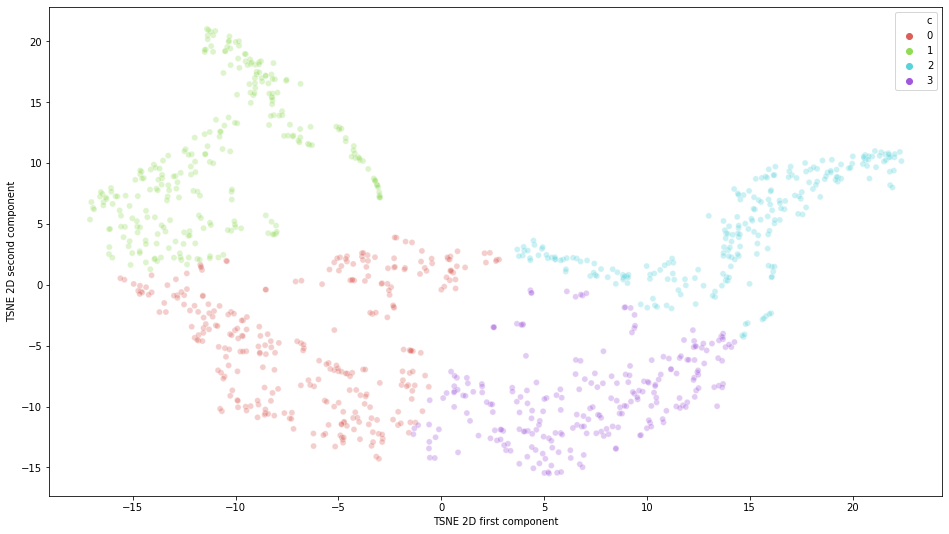

In [10]:
df_new = pd.DataFrame(tsne_new_results, columns = ['TSNE 2D first component', 'TSNE 2D second component']) 
df_new["c"] = clusters_tsne_new


plt.figure(figsize=(16,9))
sns.scatterplot(
    x='TSNE 2D first component', y='TSNE 2D second component',
    hue="c",
    palette=sns.color_palette("hls", max(clusters_tsne_new)+1),
    data=df_new,
    legend="full",
    alpha=0.3
)
plt.savefig('tsne_2D_c4.png', dpi=300, transparent=True)

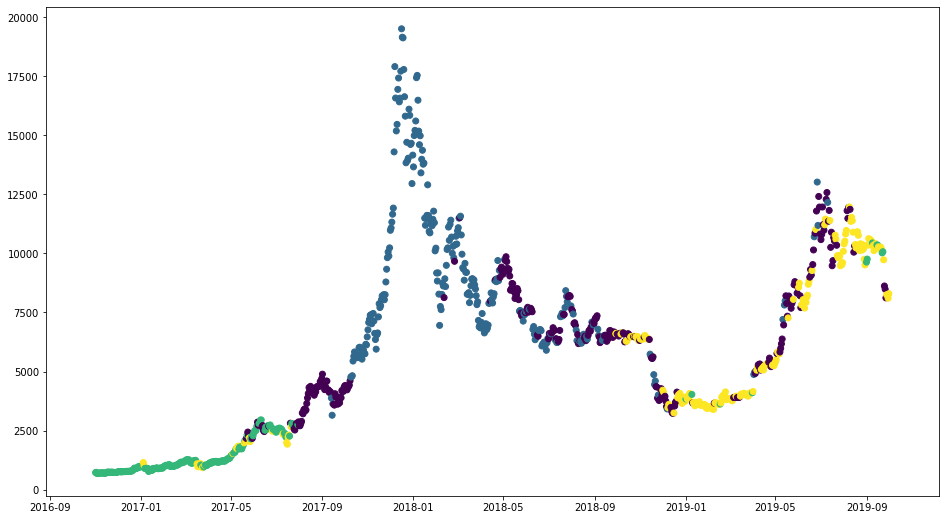

In [11]:
fig1 = plt.figure(figsize = (16,9))
plt.scatter(new_dataset1.index, new_dataset1.values[:, 0].T, c=clusters_tsne_new)
xfmt = mdates.DateFormatter("%Y-%m")
plt.savefig('tsne_24h_4clusters.png', dpi=300, transparent=True)